**KELOMPOK FOURCAST:**

Angelina Nirmala Puteri Dika Praktiko (24083010055)

Erik Saputra Rifki (24083010069)

Indy Dzakiyyatul M (24083010076)

Retno Puji Astuti (24083010080)

#ANALISIS KORELASI

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Walmart.csv')
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Langkah pertama yaitu read database agar mengetahui struktur data


In [ ]:
df.shape

(6435, 8)

ini bertujuan untuk melihat seberapa banyaknya data dalam database


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store           6435 non-null   int64  
 1   Date            6435 non-null   object 
 2   Weekly_Sales    6435 non-null   float64
 3   Holiday_Flag    6435 non-null   int64  
 4   Temperature(F)  6435 non-null   float64
 5   Fuel_Price      6435 non-null   float64
 6   CPI             6435 non-null   float64
 7   Unemployment    6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.rename(columns={'Temperature': 'Temperature(F)'}, inplace=True)

Mengubah nama kolom temperature untuk memudahkan proses analsiis selanjutnya

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature(F),0
Fuel_Price,0
CPI,0
Unemployment,0


Setelah dilakukan pengecekan, terlihat data bersih dan tidak ada data yang hilang

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

Mengubah type data pada kolom 'Date'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           6435 non-null   int64         
 1   Date            6435 non-null   datetime64[ns]
 2   Weekly_Sales    6435 non-null   float64       
 3   Holiday_Flag    6435 non-null   int64         
 4   Temperature(F)  6435 non-null   float64       
 5   Fuel_Price      6435 non-null   float64       
 6   CPI             6435 non-null   float64       
 7   Unemployment    6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Dapat dilihat jika kolom Date telah berubah menjadi datetime bukan lagi sebagai object

In [ ]:
# ubah tipe data kolom menjadi object
df['Store'] = df['Store'].astype('object')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('object')
print(df.dtypes[['Store', 'Holiday_Flag']])

Store           object
Holiday_Flag    object
dtype: object


Selanjutnya, dilakukan pengubah tipe data dari kolom Store dan Holiday_flag yang awalnya merupakan tipe data integer, diubah menjadi object agar tidak diikutkan kedalam analisis numerik.

Hal ini dikarenakan pada kolom Store datanya hanya menunjukkan data tersebut termasuk ke dalam cabang store yang mana, sedangkan untuk kolom Holiday_flag menunjukkan toko tersebut memiliki libur pada minggu tertentu atau tidak.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           6435 non-null   object        
 1   Date            6435 non-null   datetime64[ns]
 2   Weekly_Sales    6435 non-null   float64       
 3   Holiday_Flag    6435 non-null   object        
 4   Temperature(F)  6435 non-null   float64       
 5   Fuel_Price      6435 non-null   float64       
 6   CPI             6435 non-null   float64       
 7   Unemployment    6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 402.3+ KB


Digunakan untuk mengecek dan memastikan kembali jika tipe data kolom Store dan Holiday_flag sudah terganti menjadi object

In [ ]:
import numpy as np

df_num = df.select_dtypes(include=[np.number])
print("Kolom numerik:", df_num.columns.tolist())

Kolom numerik: ['Weekly_Sales', 'Temperature(F)', 'Fuel_Price', 'CPI', 'Unemployment']


Digunakan untuk mencari semua kolom yang bersifat numerik agar nantinya lebih mudah untuk dianalisis

In [ ]:
df_num.describe()

,Weekly_Sales,Temperature(F),Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


## **Interpretasi :**

Tabel diatas merupakan nilai statistik yang menunjukkan data memiliki variasi cukup besar antar toko dan tiap minggunya. Dengan "Weekly_Sales" yang cukup tinggi dan sebaran data yang melebar, menandakan adanya perbedaan performa antar toko. Kemudian variabel lainnya mencerminkan kondisi ekonomi dan lingkungan yang berubah-ubah sepanjang waktu.

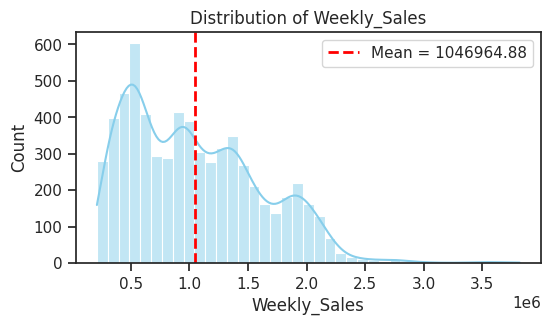

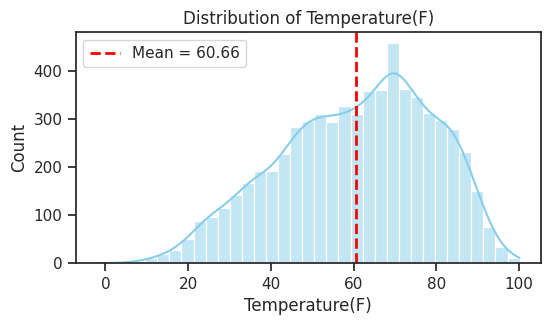

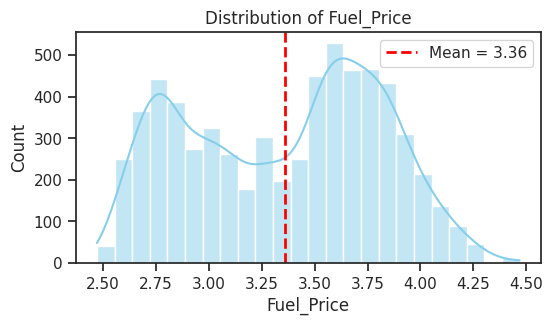

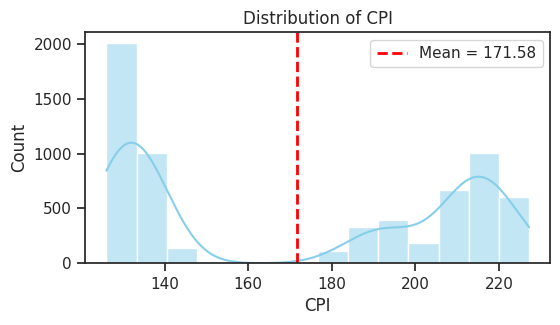

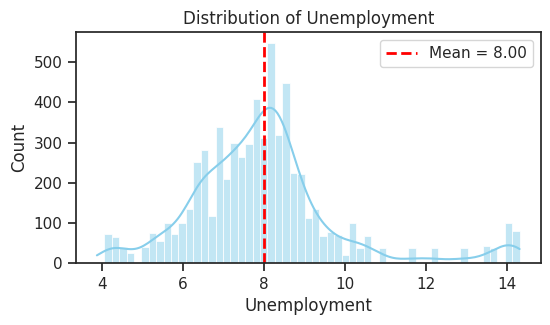

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_num.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='skyblue')
    mean_val = df[col].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

## **Interpretasi :**

**1. Distribution of Weekly_Sales :** Rata-rata penjualan mingguan setiap toko adalah 1046964,88 dolar. Nilai ini menunjukkan performa penjualan yang cukup tinggi dengan variasi yang luas antar toko dan minggu. Sebagian besar penjualan berada pada kelompok rendah hingga menengah, menandakan adanya kesenjangan pendapatan antar toko.

**2. Distribution of Temperature(F) :** Rata-rata suhu mingguan tercatat sebesar 60,66°F, menunjukkan kondisi iklim yang relatif hangat. Nilai ini masih dalam rentang normal dan dapat memengaruhi aktivitas belanja konsumen di beberapa wilayah.

**3. Distribution of Fuel_Price :** Rata-rata harga bahan bakar sebesar 3,36 dolar per liter, yang mencerminkan kondisi ekonomi dan daya beli masyarakat selama periode pengamatan. Fluktuasi harga bahan bakar berpotensi memengaruhi tingkat konsumsi dan penjualan.

**4. Distribution of CPI :** Rata-rata indeks harga konsumen adalah 171,58 dolar, menunjukkan stabilitas harga barang dan jasa secara umum. Nilai ini menjadi indikator penting untuk melihat tekanan inflasi terhadap daya beli konsumen.

**5. Distribution of Unemployment :** Rata-rata tingkat pengangguran sebesar 8,00 ribu orang, menunjukkan jumlah penduduk yang tidak bekerja dalam skala ribuan di wilayah pengamatan. Nilai ini menggambarkan kondisi ekonomi yang masih fluktuatif dan dapat berpengaruh terhadap daya beli masyarakat serta tingkat penjualan mingguan.

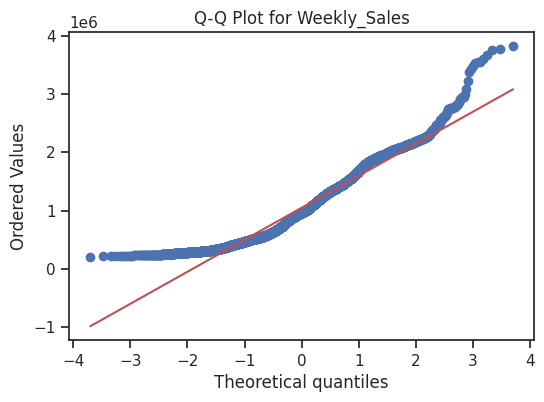

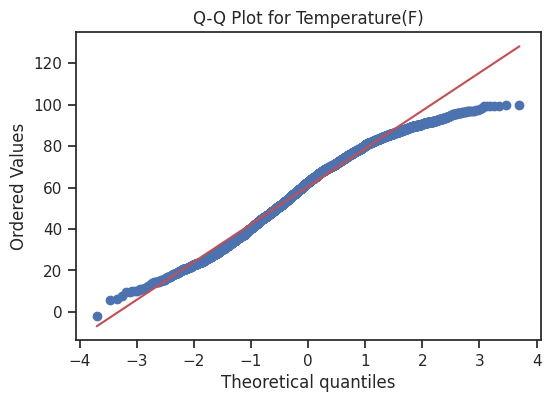

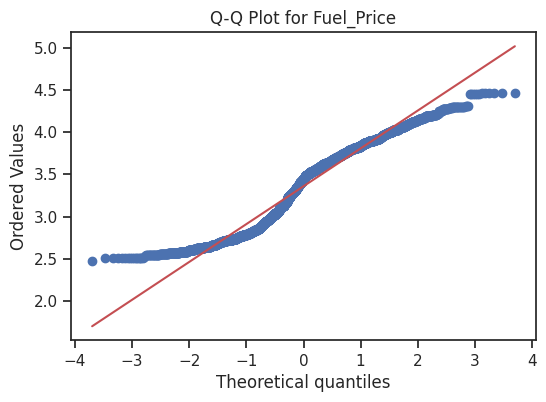

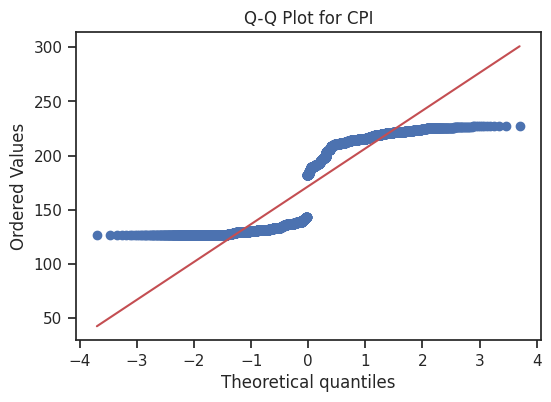

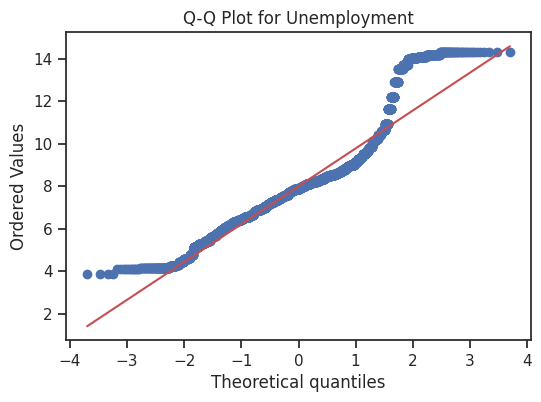

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numerical_cols = ['Weekly_Sales', 'Temperature(F)', 'Fuel_Price', 'CPI', 'Unemployment']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

## **Interpretasi :**

**1. Q-Q Plot For Weekly_Sales :** Titik data menyimpang cukup jauh dari garis diagonal, terutama pada ujung atas. Hal ini menandakan distribusi tidak normal dan terdapat outlier pada nilai penjualan tinggi.

**2. Q-Q Plot For Temperature(F) :** Titik data yang masih mengikuti garis namun sedikit melengkung terutama pada ujung atas. Hal ini menandakan distribusi yang mendekati normal, tetapi terdapat sedikit kemencengan skew ke kanan.

**3. Q-Q Plot For Fuel_Price :** Pola titik yang melengkung pada data awal dan akhir menunjukkan distribusi tidak sepenuhnya normal, cenderung skew ke kanan.

**4. Q-Q Plot For CPI :** Titik data tampak membentuk dua kelompok jelas dan jauh dari garis, hal ini menunjukkan distribusi tidak normal dengan kemungkinan data terpisah (multimodal) antar periode.

**5. Q-Q Plot For Unemployment :** Titik data tidak mengikuti garis diagonal, terutama pada ujung atas. Hal ini menandakan distribusi tidak sepenuhnya normal dan memiliki penyimpangan di bagian

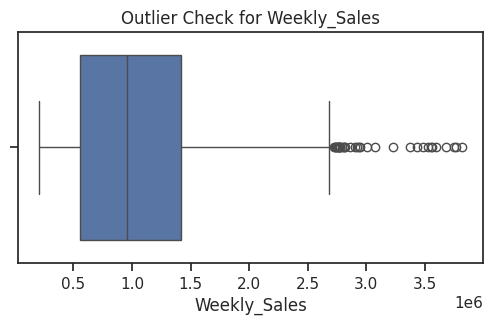

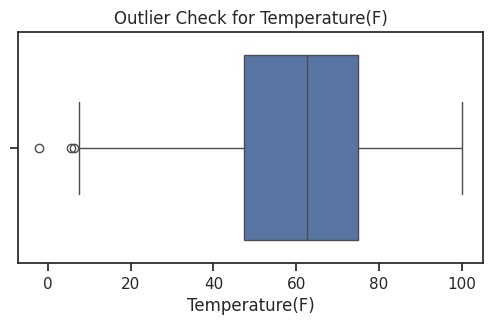

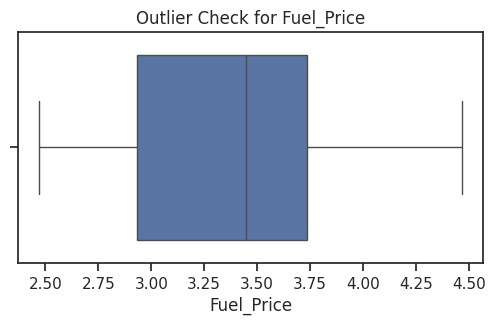

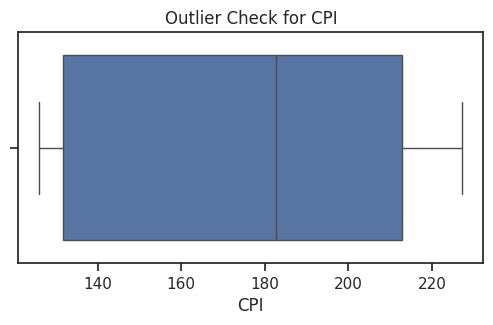

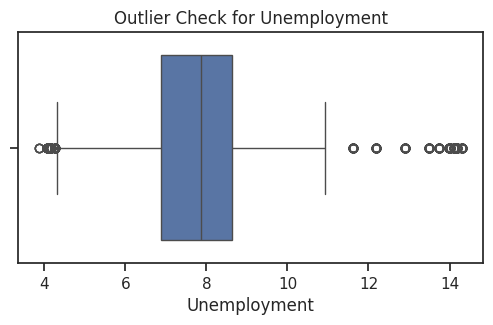

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Weekly_Sales', 'Temperature(F)', 'Fuel_Price', 'CPI', 'Unemployment']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check for {col}')
    plt.show()

## **Interpretasi :**

**1. Outlier Check For Weekly_Sales :** Menunjukkan adanya banyak outlier di sisi kanan (nilai tinggi). Distribusi data condong ke kanan (right-skewed), menandakan sebagian kecil data mingguan memiliki penjualan jauh lebih tinggi dibandingkan rata-rata.

**2. Outlier Check For Temperature(F) :** Sebagian besar data berada dalam rentang normal tanpa penyimpangan besar, tetapi terdapat beberapa outlier kecil di sisi kiri (suhu sangat rendah). Secara umum, distribusi suhu relatif stabil.

**3. Outlier Check For Fuel_Price :** Data ini tampak simetris tanpa adanya outlier. Rentang harga bahan bakar berada pada kisaran yang wajar, menunjukkan distribusi yang stabil dan tidak ada nilai ekstrem yang mencolok.

**4. Outlier Check For CPI :** Data ini tidak menunjukkan adanya outlier. Sebarannya relatif merata dan simetris, menandakan tidak ada nilai yang menyimpang jauh dari tren umum.

**5. Outlier Check For Unemployment :** Menunjukkan beberapa outlier di bagian atas (nilai tinggi). Sebagian besar data berada dalam rentang yang wajar, namun adanya nilai ekstrem menunjukkan variasi tingkat pengangguran yang cukup besar di beberapa periode. Distribusinya sedikit condong ke kanan (right-skewed).

In [ ]:
# Menghitung Korelasi Spearman antar variabel numerik
numerical_df = df.select_dtypes(include=['float64'])
correlation = numerical_df.corr(method='spearman')
correlation

,Weekly_Sales,Temperature(F),Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.070962,0.025471,-0.055040,-0.062354
Temperature(F),-0.070962,1.000000,0.128624,0.165957,0.038833
Fuel_Price,0.025471,0.128624,1.000000,-0.045867,-0.064725
CPI,-0.055040,0.165957,-0.045867,1.000000,-0.388563
Unemployment,-0.062354,0.038833,-0.064725,-0.388563,1.000000


Hasil analisis menunjukkan bahwa seluruh variabel meiliki hubungan linear yang sangat lemah terhadap Weekly_Sales. Nilai korelasi antara Weekly_Sales dengan Temperature (-0.071), Fuel_Price (0.025), CPI (-0.055), dan Unemployment (-0.062) seluruhnya di bawah 0.1, menandakan bahwa perubahan-perubahan pada variabel tersebut tidak berpengaruh signifikan terhadap penjualan mingguan.

Sementara itu, hubungan antar variabel lainnya juga umumnya lemah, kecuali antara CPI dan Unemployment (r = -0.389) menunjukkan korelasi negatif sedang. Artinya, ketika inflasi meningkat, tingkat pengangguran cenderung menurun.

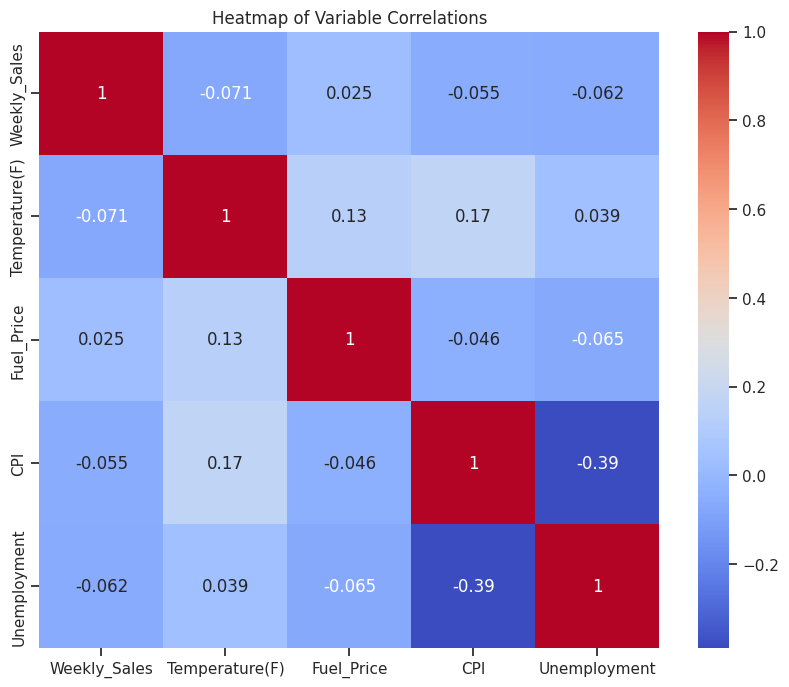

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()

**Interpretasi:**

1. **Weekly_Sales**


* Memiliki korelasi sangat lemah dengan semua variabel lain.
* Temperature (r = -0.071) → sedikit berbanding terbalik, artinya penjualan sedikit menurun saat suhu naik.
* Fuel_Price (r = 0.025) → hampir tidak ada pengaruh antara harga bahan bakar dengan penjualan.
* CPI (r = -0.055) → inflasi tidak berpengaruh signifikan terhadap penjualan.
* Unemployment (r = -0.062) → peningkatan pengangguran sedikit diikuti penurunan penjualan, tapi hubungannya sangat lemah.

2. **Temperature(F)**
* Weekly_Sales → hubungan negatif lemah.
* Fuel_Price (r = 0.13) → hubungan positif lemah, harga bahan bakar sedikit naik saat suhu meningkat.
* CPI (r = 0.17) → hubungan positif lemah, CPI cenderung naik saat suhu lebih tinggi.
* Unemployment (r = 0.039) → hubungan positif sangat lemah, hampir tidak ada pengaruh.

3. **Fuel_Price**
* Weekly_Sales → hubungan positif sangat lemah.
* Temperature → hubungan positif lemah.
* CPI (r = -0.046) → hubungan negatif sangat lemah.
* Unemployment (r = -0.065) → hubungan negatif sangat lemah.

4. **CPI**
* Weekly_Sales → hubungan negatif sangat lemah.
* Temperature → hubungan positif lemah.
* Fuel_Price → hubungan negatif sangat lemah.
* CPI (r = -0.39) → hubungan negatif sedang, saat CPI naik, tingkat pengangguran cenderung turun.

5. **Unemployment**
* Weekly_Sales → hubungan negatif sangat lemah.
* Temperature → hubungan positif sangat lemah.
* Fuel_Price → hubungan negatif sangat lemah.
* CPI → hubungan negatif sedang, menunjukkan keterkaitan ekonomi antara inflasi dan pengangguran.  



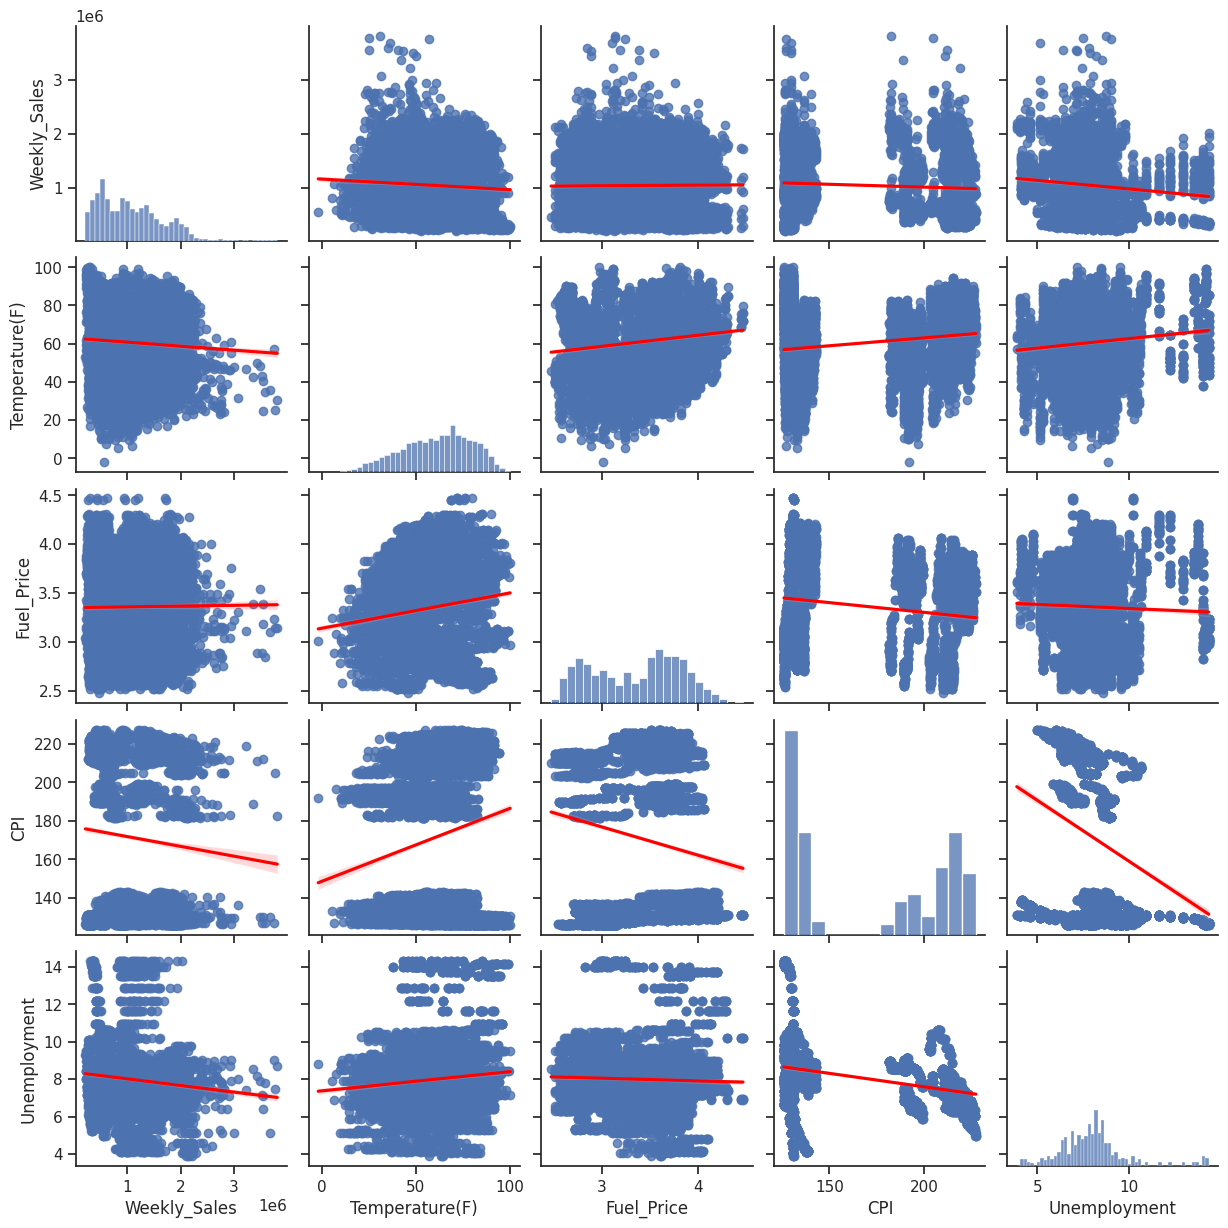

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    numerical_df,
    vars=numerical_df.columns,kind='reg',
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.show()

**Interpretasi:**

* Weekly_Sales tampak menyebar tanpa pola linear yang jelas terhadap Temperature, Fuel_Price, CPI, maupun Unemployment, menegaskan bahwa hubungan antar variabel ini **sangat lemah.**

* Temperature dan CPI menunjukkan tren positif lemah yang berrati ketika suhu meningkat, CPI sedikit naik.

* CPI dan Unemployment menunjukkan tren negatif, artinya semakin tinggi CPI, tingkat pengangguran cenderung menurun.

* Sebagian besar sebaran data membentuk pola acak, menandakan tidak ada hubungan linear yang kuat antar variabel numerik.

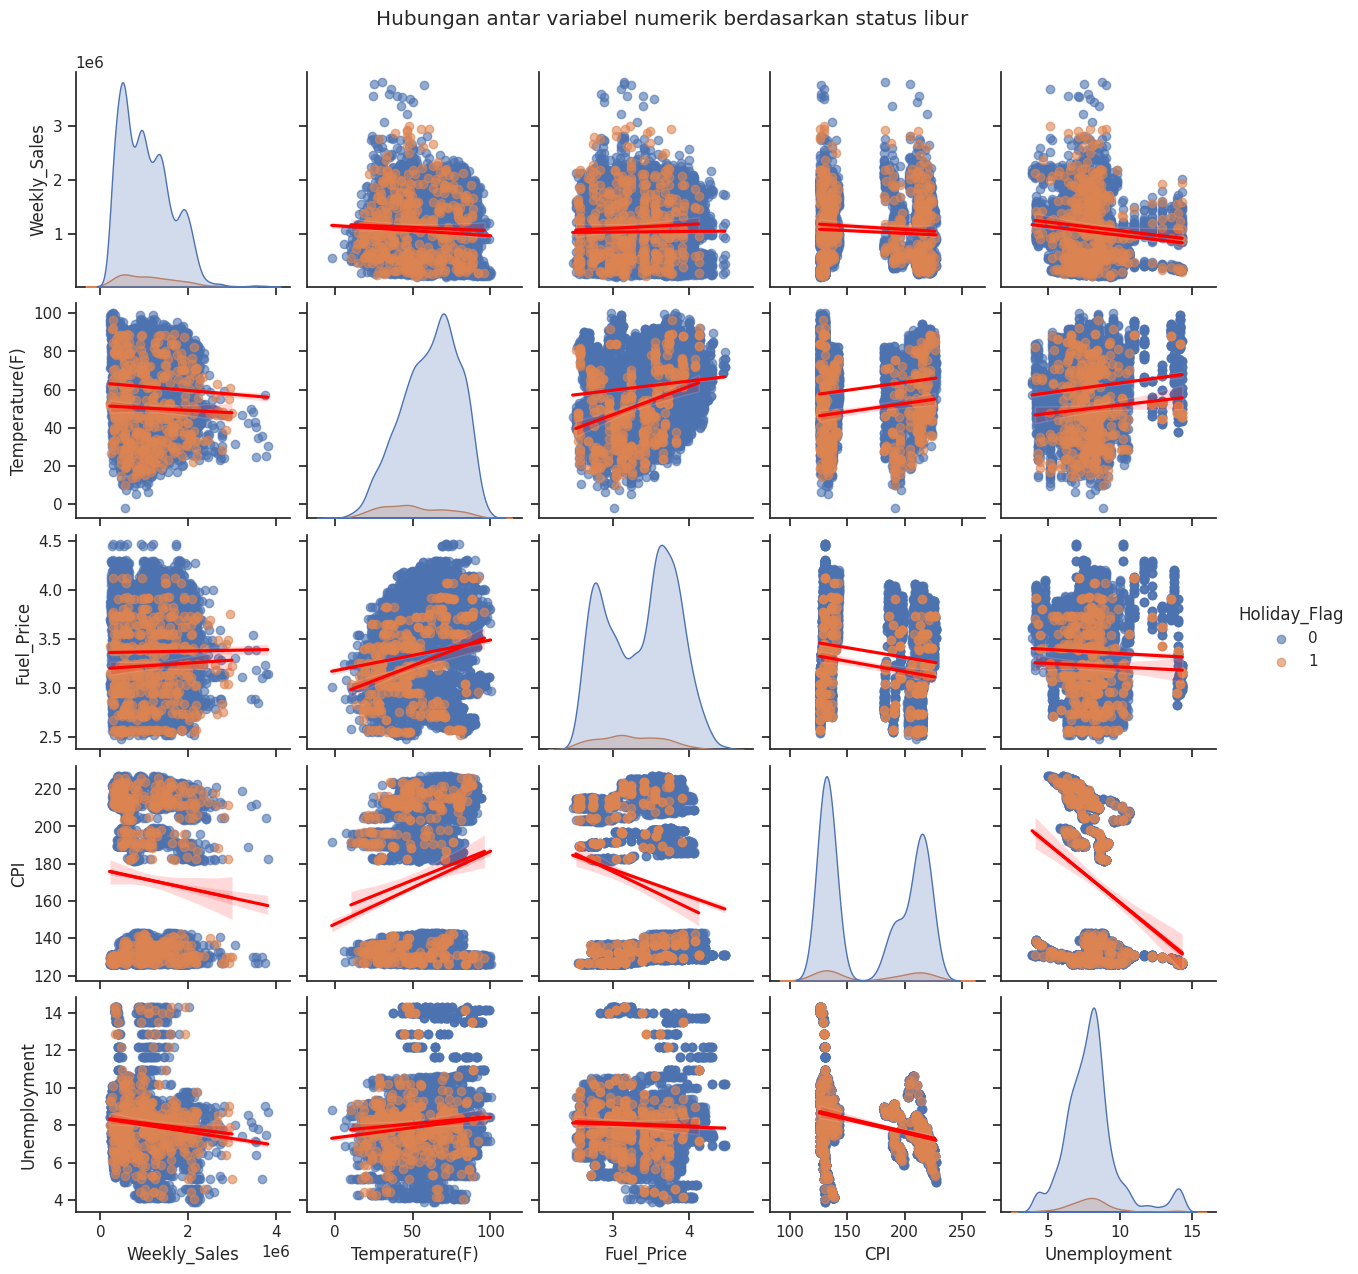

In [ ]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(
    df,
    vars=['Weekly_Sales', 'Temperature(F)', 'Fuel_Price', 'CPI', 'Unemployment'],
    hue='Holiday_Flag',
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)

plt.suptitle("Hubungan antar variabel numerik berdasarkan status libur", y=1.02)
plt.show()

**Interpretasi:**

Titik berwarna oranye (libur) dan biru (non-libur) memiliki pola yang hampir sama, sama namun terlihat perbedaan kecil pada beberapa variabel:

* Penjualan (Weekly_Sales) cenderung lebih tinggi saat libur, ditunjukkan oleh sebaran titik oranye yang sedikit naik dibanding biru.

* Hubungan antara CPI dan Unemployment tetap negatif pada kedua kondisi, tapi cenderung lebih tajam saat libur.

* Temperature dan Fuel_Price tidak menunjukkan perbedaan mencolok antara libur dan non-libur.

Secara umum, status libur tidak banyak mengubah pola hubungan antar variabel, meskipun ada sedikit peningkatan penjualan saat libur.

#HIOPTESIS & REGRESI

#ANALISIS DERET WAKTU

In [ ]:
weeks_per_store = df.groupby('Store')['Date'].nunique().reset_index()
weeks_per_store.columns = ['Store', 'Total_Weeks']
print(weeks_per_store)

    Store  Total_Weeks
0       1          143
1       2          143
2       3          143
3       4          143
4       5          143
5       6          143
6       7          143
7       8          143
8       9          143
9      10          143
10     11          143
11     12          143
12     13          143
13     14          143
14     15          143
15     16          143
16     17          143
17     18          143
18     19          143
19     20          143
20     21          143
21     22          143
22     23          143
23     24          143
24     25          143
25     26          143
26     27          143
27     28          143
28     29          143
29     30          143
30     31          143
31     32          143
32     33          143
33     34          143
34     35          143
35     36          143
36     37          143
37     38          143
38     39          143
39     40          143
40     41          143
41     42          143
42     43  

#MACHINE LEARNING